In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

### coco: 894 // flickr: 184 // open_image: 616

In [2]:
dir_path = "../Data/disaster/"

img_names = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        img_names.append(folder+'/'+img)
random.shuffle(img_names)
disaster = img_names[:4000]
print(len(disaster))

4000


In [3]:
## open_image 1만장
dir_path = "../../disk/Data/open_image/train_0/"

img_names = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        img_names.append(folder+'/'+img)
random.shuffle(img_names)
open_image_non = img_names[:16000]
print(len(open_image_non))

16000


In [4]:
## coco_image 1만장
dir_path = "../Data/train2017"

img_names = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        img_names.append(folder+'/'+img)
random.shuffle(img_names)
coco_non = img_names[:20000]
print(len(coco_non))

20000


In [5]:
print(coco_non[:3])

['../Data/train2017/000000076264.jpg', '../Data/train2017/000000224736.jpg', '../Data/train2017/000000284160.jpg']


In [6]:
non = coco_non + open_image_non
random.shuffle(non)
print(len(non))

36000


##### labeling

##### split train, test

In [7]:
### train: test (4:1)
## 36000 (1/5), 4000 (1/5)
non_ratio=28800
dis_ratio=3200
trn_disater = non[:non_ratio] + disaster[:dis_ratio]
tst_disater = non[non_ratio:] + disaster[dis_ratio:]
trn_label = [0]*int(len(non[:non_ratio])) + [1]*int(len(disaster[:dis_ratio]))
tst_label = [0]*int(len(non[non_ratio:])) + [1]*int(len(disaster[dis_ratio:]))
print(len(trn_label))
print(len(tst_label))


32000
8000


In [8]:
trn_df = pd.DataFrame(trn_disater, columns=['image_id'])
trn_df['dir'] = trn_df['image_id'].apply(lambda x: os.path.dirname(x))
trn_df['image_id'] = trn_df['image_id'].apply(lambda x: os.path.basename(x))
trn_df['label'] = trn_label
train = trn_df
train

,image_id,dir,label
0,084d57f19cab3c2a.jpg,../../disk/Data/open_image/train_0,0
1,0ba849ff0f2c3c06.jpg,../../disk/Data/open_image/train_0,0
2,000000560282.jpg,../Data/train2017,0
3,000000510838.jpg,../Data/train2017,0
4,001cdd25e148cd36.jpg,../../disk/Data/open_image/train_0,0
...,...,...,...
31995,000000103276_03.jpg,../Data/disaster/augmented,1
31996,In the picture I can see the snowfall where we...,../Data/disaster/generated/open_image,1
31997,As we can see in the image there are trees cur...,../Data/disaster/generated/open_image,1
31998,000000381214_01.jpg,../Data/disaster/augmented,1


In [9]:
tst_df = pd.DataFrame(tst_disater, columns=['image_id'])
tst_df['dir'] = tst_df['image_id'].apply(lambda x: os.path.dirname(x))
tst_df['image_id'] = tst_df['image_id'].apply(lambda x: os.path.basename(x))
tst_df['label'] = tst_label
test = tst_df
test

,image_id,dir,label
0,000000496253.jpg,../Data/train2017,0
1,01bec63ca15adae7.jpg,../../disk/Data/open_image/train_0,0
2,000000265273.jpg,../Data/train2017,0
3,000000428495.jpg,../Data/train2017,0
4,000000011422.jpg,../Data/train2017,0
...,...,...,...
7995,3f1ec100e5841f58_03.jpg,../Data/disaster/augmented,1
7996,290d59dab457a369_03.jpg,../Data/disaster/augmented,1
7997,A red car is caught in an explosion ._00.png,../Data/disaster/generated/flickr,1
7998,In the center of the image we can see trees hi...,../Data/disaster/generated/open_image,1


In [10]:
project_name = 'disaster_classfication_res18_01'
user = 'hojunking'
run_name = 'disaster_classfication_res18_01'

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: hojunking. Use `wandb login --relogin` to force relogin


Training start with fold: 0 epoch: 100 

Fold: 0
Epoch 0/99


epoch 0 loss: 0.0305: 100%|███████████████████| 100/100 [01:58<00:00,  1.18s/it]


Fold: 0
Epoch 1/99


epoch 1 loss: 0.0236: 100%|███████████████████| 100/100 [00:12<00:00,  7.77it/s]


Fold: 0
Epoch 2/99


epoch 2 loss: 0.0201: 100%|███████████████████| 100/100 [00:12<00:00,  7.82it/s]


Fold: 0
Epoch 3/99


epoch 3 loss: 0.0234: 100%|███████████████████| 100/100 [00:12<00:00,  7.99it/s]

EarlyStopping counter: 1 out of 6
Best F1 score from now: 0.9810343550266368
Fold: 0
Epoch 4/99



epoch 4 loss: 0.0354: 100%|███████████████████| 100/100 [00:13<00:00,  7.53it/s]

EarlyStopping counter: 2 out of 6
Best F1 score from now: 0.9810343550266368
Fold: 0
Epoch 5/99



epoch 5 loss: 0.0328: 100%|███████████████████| 100/100 [00:12<00:00,  7.75it/s]

EarlyStopping counter: 3 out of 6
Best F1 score from now: 0.9810343550266368
Fold: 0
Epoch 6/99



epoch 6 loss: 0.0324: 100%|███████████████████| 100/100 [00:13<00:00,  7.44it/s]

EarlyStopping counter: 4 out of 6
Best F1 score from now: 0.9810343550266368
Fold: 0
Epoch 7/99



epoch 7 loss: 0.0258: 100%|███████████████████| 100/100 [00:13<00:00,  7.68it/s]

EarlyStopping counter: 5 out of 6
Best F1 score from now: 0.9810343550266368
Fold: 0
Epoch 8/99



epoch 8 loss: 0.0225: 100%|███████████████████| 100/100 [00:12<00:00,  7.90it/s]


Fold: 0
Epoch 9/99


epoch 9 loss: 0.0191: 100%|███████████████████| 100/100 [00:12<00:00,  7.86it/s]


Fold: 0
Epoch 10/99


epoch 10 loss: 0.0217: 100%|██████████████████| 100/100 [00:13<00:00,  7.52it/s]

EarlyStopping counter: 1 out of 6
Best F1 score from now: 0.984777304537702
Fold: 0
Epoch 11/99



epoch 11 loss: 0.0194: 100%|██████████████████| 100/100 [00:13<00:00,  7.46it/s]

EarlyStopping counter: 2 out of 6
Best F1 score from now: 0.984777304537702
Fold: 0
Epoch 12/99



epoch 12 loss: 0.0177: 100%|██████████████████| 100/100 [00:12<00:00,  7.70it/s]


Fold: 0
Epoch 13/99


epoch 13 loss: 0.0198: 100%|██████████████████| 100/100 [00:12<00:00,  7.78it/s]

EarlyStopping counter: 1 out of 6
Best F1 score from now: 0.9860529644124498
Fold: 0
Epoch 14/99



epoch 14 loss: 0.0191: 100%|██████████████████| 100/100 [00:13<00:00,  7.50it/s]

EarlyStopping counter: 2 out of 6
Best F1 score from now: 0.9860529644124498
Fold: 0
Epoch 15/99



epoch 15 loss: 0.0193: 100%|██████████████████| 100/100 [00:12<00:00,  7.85it/s]

EarlyStopping counter: 3 out of 6
Best F1 score from now: 0.9860529644124498
Fold: 0
Epoch 16/99



epoch 16 loss: 0.0187: 100%|██████████████████| 100/100 [00:12<00:00,  7.86it/s]

EarlyStopping counter: 4 out of 6
Best F1 score from now: 0.9860529644124498
Fold: 0
Epoch 17/99



epoch 17 loss: 0.0206: 100%|██████████████████| 100/100 [00:12<00:00,  7.84it/s]

EarlyStopping counter: 5 out of 6
Best F1 score from now: 0.9860529644124498
Fold: 0
Epoch 18/99



epoch 18 loss: 0.0199: 100%|██████████████████| 100/100 [00:13<00:00,  7.57it/s]


EarlyStopping counter: 6 out of 6
Best F1 score from now: 0.9860529644124498
stop called
time : 0:35:09
fold: 0, Best Epoch : 12/ 19
fold: 0, Best Train Marco F1 : 1.00000
[[23040     0]
 [    0 23040]]
fold: 0, Best Valid Marco F1 : 0.98605
[[5747   13]
 [  19  621]]
---------------------------------------------------------
Training start with fold: 1 epoch: 100 

Fold: 1
Epoch 0/99


epoch 0 loss: 0.0213: 100%|███████████████████| 100/100 [00:12<00:00,  7.91it/s]


Fold: 1
Epoch 1/99


epoch 1 loss: 0.0187: 100%|███████████████████| 100/100 [00:12<00:00,  7.86it/s]


Fold: 1
Epoch 2/99


epoch 2 loss: 0.0231: 100%|███████████████████| 100/100 [00:12<00:00,  7.88it/s]

EarlyStopping counter: 1 out of 6
Best F1 score from now: 0.984734771077107
Fold: 1
Epoch 3/99



epoch 3 loss: 0.0187: 100%|███████████████████| 100/100 [00:12<00:00,  7.76it/s]


Fold: 1
Epoch 4/99


epoch 4 loss: 0.0169: 100%|███████████████████| 100/100 [00:12<00:00,  7.86it/s]


Fold: 1
Epoch 5/99


epoch 5 loss: 0.0229: 100%|███████████████████| 100/100 [00:12<00:00,  7.85it/s]

EarlyStopping counter: 1 out of 6
Best F1 score from now: 0.9873516674638887
Fold: 1
Epoch 6/99



epoch 6 loss: 0.0168: 100%|███████████████████| 100/100 [00:12<00:00,  7.73it/s]

EarlyStopping counter: 2 out of 6
Best F1 score from now: 0.9873516674638887
Fold: 1
Epoch 7/99



epoch 7 loss: 0.0127: 100%|███████████████████| 100/100 [00:12<00:00,  7.81it/s]


Fold: 1
Epoch 8/99


epoch 8 loss: 0.0123: 100%|███████████████████| 100/100 [00:12<00:00,  8.03it/s]


Fold: 1
Epoch 9/99


epoch 9 loss: 0.0137: 100%|███████████████████| 100/100 [00:12<00:00,  7.75it/s]

EarlyStopping counter: 1 out of 6
Best F1 score from now: 0.9899825613542597
Fold: 1
Epoch 10/99



epoch 10 loss: 0.0144: 100%|██████████████████| 100/100 [00:13<00:00,  7.61it/s]

EarlyStopping counter: 2 out of 6
Best F1 score from now: 0.9899825613542597
Fold: 1
Epoch 11/99



epoch 11 loss: 0.0127: 100%|██████████████████| 100/100 [00:12<00:00,  7.94it/s]

EarlyStopping counter: 3 out of 6
Best F1 score from now: 0.9899825613542597
Fold: 1
Epoch 12/99



epoch 12 loss: 0.0149: 100%|██████████████████| 100/100 [00:13<00:00,  7.68it/s]

EarlyStopping counter: 4 out of 6
Best F1 score from now: 0.9899825613542597
Fold: 1
Epoch 13/99



epoch 13 loss: 0.0148: 100%|██████████████████| 100/100 [00:13<00:00,  7.63it/s]

EarlyStopping counter: 5 out of 6
Best F1 score from now: 0.9899825613542597
Fold: 1
Epoch 14/99



epoch 14 loss: 0.0153: 100%|██████████████████| 100/100 [00:13<00:00,  7.68it/s]


EarlyStopping counter: 6 out of 6
Best F1 score from now: 0.9899825613542597
stop called
time : 0:21:14
fold: 1, Best Epoch : 8/ 15
fold: 1, Best Train Marco F1 : 1.00000
[[23040     0]
 [    0 23040]]
fold: 1, Best Valid Marco F1 : 0.98998
[[5751    9]
 [  14  626]]
---------------------------------------------------------
Training start with fold: 2 epoch: 100 

Fold: 2
Epoch 0/99


epoch 0 loss: 0.0227: 100%|███████████████████| 100/100 [00:13<00:00,  7.53it/s]


Fold: 2
Epoch 1/99


epoch 1 loss: 0.0264: 100%|███████████████████| 100/100 [00:13<00:00,  7.60it/s]

EarlyStopping counter: 1 out of 6
Best F1 score from now: 0.9785386445716902
Fold: 2
Epoch 2/99



epoch 2 loss: 0.0197: 100%|███████████████████| 100/100 [00:12<00:00,  7.71it/s]


Fold: 2
Epoch 3/99


epoch 3 loss: 0.0213: 100%|███████████████████| 100/100 [00:12<00:00,  7.91it/s]

EarlyStopping counter: 1 out of 6
Best F1 score from now: 0.9846272425438867
Fold: 2
Epoch 4/99



epoch 4 loss: 0.0313: 100%|███████████████████| 100/100 [00:12<00:00,  7.77it/s]

EarlyStopping counter: 2 out of 6
Best F1 score from now: 0.9846272425438867
Fold: 2
Epoch 5/99



epoch 5 loss: 0.0243: 100%|███████████████████| 100/100 [00:12<00:00,  7.91it/s]

EarlyStopping counter: 3 out of 6
Best F1 score from now: 0.9846272425438867
Fold: 2
Epoch 6/99



epoch 6 loss: 0.0206: 100%|███████████████████| 100/100 [00:12<00:00,  7.72it/s]

EarlyStopping counter: 4 out of 6
Best F1 score from now: 0.9846272425438867
Fold: 2
Epoch 7/99



epoch 7 loss: 0.0189: 100%|███████████████████| 100/100 [00:13<00:00,  7.66it/s]

EarlyStopping counter: 5 out of 6
Best F1 score from now: 0.9846272425438867
Fold: 2
Epoch 8/99



epoch 8 loss: 0.0194: 100%|███████████████████| 100/100 [00:12<00:00,  7.89it/s]


EarlyStopping counter: 6 out of 6
Best F1 score from now: 0.9846272425438867
stop called
time : 0:12:44
fold: 2, Best Epoch : 2/ 9
fold: 2, Best Train Marco F1 : 0.99996
[[23038     2]
 [    0 23040]]
fold: 2, Best Valid Marco F1 : 0.98463
[[5751    9]
 [  26  614]]
---------------------------------------------------------
Training start with fold: 3 epoch: 100 

Fold: 3
Epoch 0/99


epoch 0 loss: 0.0243: 100%|███████████████████| 100/100 [00:12<00:00,  8.01it/s]


Fold: 3
Epoch 1/99


epoch 1 loss: 0.0254: 100%|███████████████████| 100/100 [00:12<00:00,  7.97it/s]


Fold: 3
Epoch 2/99


epoch 2 loss: 0.0237: 100%|███████████████████| 100/100 [00:12<00:00,  7.83it/s]

EarlyStopping counter: 1 out of 6
Best F1 score from now: 0.9791504920671019
Fold: 3
Epoch 3/99



epoch 3 loss: 0.0301: 100%|███████████████████| 100/100 [00:12<00:00,  7.74it/s]

EarlyStopping counter: 2 out of 6
Best F1 score from now: 0.9791504920671019
Fold: 3
Epoch 4/99



epoch 4 loss: 0.0398: 100%|███████████████████| 100/100 [00:12<00:00,  8.03it/s]

EarlyStopping counter: 3 out of 6
Best F1 score from now: 0.9791504920671019
Fold: 3
Epoch 5/99



epoch 5 loss: 0.0234: 100%|███████████████████| 100/100 [00:12<00:00,  7.80it/s]

EarlyStopping counter: 4 out of 6
Best F1 score from now: 0.9791504920671019
Fold: 3
Epoch 6/99



epoch 6 loss: 0.0217: 100%|███████████████████| 100/100 [00:12<00:00,  7.76it/s]


Fold: 3
Epoch 7/99


epoch 7 loss: 0.0145: 100%|███████████████████| 100/100 [00:12<00:00,  7.80it/s]


Fold: 3
Epoch 8/99


epoch 8 loss: 0.0141: 100%|███████████████████| 100/100 [00:12<00:00,  7.80it/s]


Fold: 3
Epoch 9/99


epoch 9 loss: 0.0138: 100%|███████████████████| 100/100 [00:12<00:00,  7.76it/s]

Fold: 3
Epoch 10/99



epoch 10 loss: 0.0153: 100%|██████████████████| 100/100 [00:13<00:00,  7.50it/s]


Fold: 3
Epoch 11/99


epoch 11 loss: 0.0181: 100%|██████████████████| 100/100 [00:13<00:00,  7.58it/s]
/tmp/ipykernel_4037/31164258.py:89: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure().add_subplot(1, 1, 1)


Fold: 3
Epoch 12/99


epoch 12 loss: 0.0151: 100%|██████████████████| 100/100 [00:12<00:00,  7.92it/s]


Fold: 3
Epoch 13/99


epoch 13 loss: 0.0156: 100%|██████████████████| 100/100 [00:12<00:00,  8.00it/s]

EarlyStopping counter: 1 out of 6
Best F1 score from now: 0.9899404346620637
Fold: 3
Epoch 14/99



epoch 14 loss: 0.0145: 100%|██████████████████| 100/100 [00:12<00:00,  7.98it/s]


Fold: 3
Epoch 15/99


epoch 15 loss: 0.4003: 100%|██████████████████| 100/100 [00:13<00:00,  7.65it/s]

EarlyStopping counter: 1 out of 6
Best F1 score from now: 0.9903710536365138
Fold: 3
Epoch 16/99



epoch 16 loss: 0.0164: 100%|██████████████████| 100/100 [00:12<00:00,  7.95it/s]

EarlyStopping counter: 2 out of 6
Best F1 score from now: 0.9903710536365138
Fold: 3
Epoch 17/99



epoch 17 loss: 0.0262: 100%|██████████████████| 100/100 [00:12<00:00,  7.77it/s]

EarlyStopping counter: 3 out of 6
Best F1 score from now: 0.9903710536365138
Fold: 3
Epoch 18/99



epoch 18 loss: 0.0137: 100%|██████████████████| 100/100 [00:12<00:00,  7.85it/s]


Fold: 3
Epoch 19/99


epoch 19 loss: 0.0128: 100%|██████████████████| 100/100 [00:12<00:00,  7.70it/s]


Fold: 3
Epoch 20/99


epoch 20 loss: 0.0123: 100%|██████████████████| 100/100 [00:12<00:00,  7.96it/s]

EarlyStopping counter: 1 out of 6
Best F1 score from now: 0.9917015613962641
Fold: 3
Epoch 21/99



epoch 21 loss: 0.0131: 100%|██████████████████| 100/100 [00:13<00:00,  7.43it/s]

EarlyStopping counter: 2 out of 6
Best F1 score from now: 0.9917015613962641
Fold: 3
Epoch 22/99



epoch 22 loss: 0.0128: 100%|██████████████████| 100/100 [00:12<00:00,  7.89it/s]


Fold: 3
Epoch 23/99


epoch 23 loss: 0.0125: 100%|██████████████████| 100/100 [00:13<00:00,  7.68it/s]


Fold: 3
Epoch 24/99


epoch 24 loss: 0.0127: 100%|██████████████████| 100/100 [00:12<00:00,  7.98it/s]

EarlyStopping counter: 1 out of 6
Best F1 score from now: 0.9925750812492891
Fold: 3
Epoch 25/99



epoch 25 loss: 0.0135: 100%|██████████████████| 100/100 [00:13<00:00,  7.57it/s]

EarlyStopping counter: 2 out of 6
Best F1 score from now: 0.9925750812492891
Fold: 3
Epoch 26/99



epoch 26 loss: 0.0119: 100%|██████████████████| 100/100 [00:12<00:00,  7.81it/s]

EarlyStopping counter: 3 out of 6
Best F1 score from now: 0.9925750812492891
Fold: 3
Epoch 27/99



epoch 27 loss: 0.0128: 100%|██████████████████| 100/100 [00:12<00:00,  7.77it/s]

EarlyStopping counter: 4 out of 6
Best F1 score from now: 0.9925750812492891
Fold: 3
Epoch 28/99



epoch 28 loss: 0.0131: 100%|██████████████████| 100/100 [00:12<00:00,  7.95it/s]

EarlyStopping counter: 5 out of 6
Best F1 score from now: 0.9925750812492891
Fold: 3
Epoch 29/99



epoch 29 loss: 0.0140: 100%|██████████████████| 100/100 [00:12<00:00,  8.03it/s]


EarlyStopping counter: 6 out of 6
Best F1 score from now: 0.9925750812492891
stop called
time : 0:42:27
fold: 3, Best Epoch : 23/ 30
fold: 3, Best Train Marco F1 : 1.00000
[[23040     0]
 [    0 23040]]
fold: 3, Best Valid Marco F1 : 0.99258
[[5756    4]
 [  13  627]]
---------------------------------------------------------
Training start with fold: 4 epoch: 100 

Fold: 4
Epoch 0/99


epoch 0 loss: 0.0291: 100%|███████████████████| 100/100 [00:12<00:00,  7.78it/s]


Fold: 4
Epoch 1/99


epoch 1 loss: 0.0291: 100%|███████████████████| 100/100 [00:13<00:00,  7.65it/s]


Fold: 4
Epoch 2/99


epoch 2 loss: 0.0251: 100%|███████████████████| 100/100 [00:12<00:00,  7.94it/s]


Fold: 4
Epoch 3/99


epoch 3 loss: 0.0257: 100%|███████████████████| 100/100 [00:12<00:00,  7.77it/s]

EarlyStopping counter: 1 out of 6
Best F1 score from now: 0.9817454748743576
Fold: 4
Epoch 4/99



epoch 4 loss: 0.0235: 100%|███████████████████| 100/100 [00:12<00:00,  7.76it/s]

EarlyStopping counter: 2 out of 6
Best F1 score from now: 0.9817454748743576
Fold: 4
Epoch 5/99



epoch 5 loss: 0.0291: 100%|███████████████████| 100/100 [00:12<00:00,  7.81it/s]

EarlyStopping counter: 3 out of 6
Best F1 score from now: 0.9817454748743576
Fold: 4
Epoch 6/99



epoch 6 loss: 0.0341: 100%|███████████████████| 100/100 [00:12<00:00,  7.76it/s]

EarlyStopping counter: 4 out of 6
Best F1 score from now: 0.9817454748743576
Fold: 4
Epoch 7/99



epoch 7 loss: 0.0258: 100%|███████████████████| 100/100 [00:12<00:00,  7.93it/s]


Fold: 4
Epoch 8/99


epoch 8 loss: 0.0328: 100%|███████████████████| 100/100 [00:12<00:00,  7.84it/s]

EarlyStopping counter: 1 out of 6
Best F1 score from now: 0.9837716795934697
Fold: 4
Epoch 9/99



epoch 9 loss: 0.0299: 100%|███████████████████| 100/100 [00:12<00:00,  7.89it/s]

EarlyStopping counter: 2 out of 6
Best F1 score from now: 0.9837716795934697
Fold: 4
Epoch 10/99



epoch 10 loss: 0.0190: 100%|██████████████████| 100/100 [00:13<00:00,  7.63it/s]


Fold: 4
Epoch 11/99


epoch 11 loss: 0.0291: 100%|██████████████████| 100/100 [00:12<00:00,  7.91it/s]

EarlyStopping counter: 1 out of 6
Best F1 score from now: 0.9890962650550764
Fold: 4
Epoch 12/99



epoch 12 loss: 0.0304: 100%|██████████████████| 100/100 [00:12<00:00,  7.88it/s]

EarlyStopping counter: 2 out of 6
Best F1 score from now: 0.9890962650550764
Fold: 4
Epoch 13/99



epoch 13 loss: 0.0315: 100%|██████████████████| 100/100 [00:12<00:00,  7.76it/s]

EarlyStopping counter: 3 out of 6
Best F1 score from now: 0.9890962650550764
Fold: 4
Epoch 14/99



epoch 14 loss: 0.0218: 100%|██████████████████| 100/100 [00:12<00:00,  7.83it/s]

EarlyStopping counter: 4 out of 6
Best F1 score from now: 0.9890962650550764
Fold: 4
Epoch 15/99



epoch 15 loss: 0.0221: 100%|██████████████████| 100/100 [00:13<00:00,  7.63it/s]

EarlyStopping counter: 5 out of 6
Best F1 score from now: 0.9890962650550764
Fold: 4
Epoch 16/99



epoch 16 loss: 0.0207: 100%|██████████████████| 100/100 [00:12<00:00,  7.86it/s]


EarlyStopping counter: 6 out of 6
Best F1 score from now: 0.9890962650550764
stop called
time : 0:24:04
fold: 4, Best Epoch : 10/ 17
fold: 4, Best Train Marco F1 : 0.99993
[[23038     2]
 [    1 23039]]
fold: 4, Best Valid Marco F1 : 0.98910
[[5751    9]
 [  16  624]]
---------------------------------------------------------


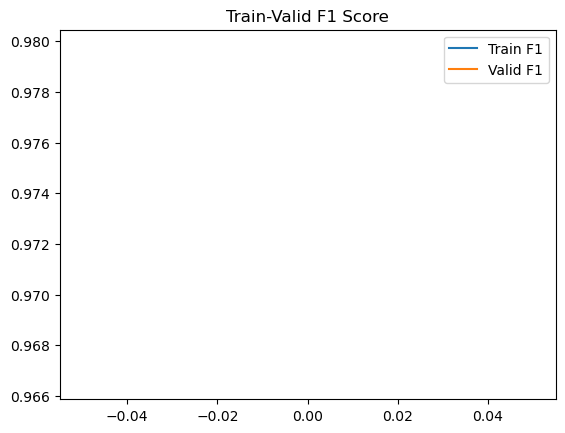

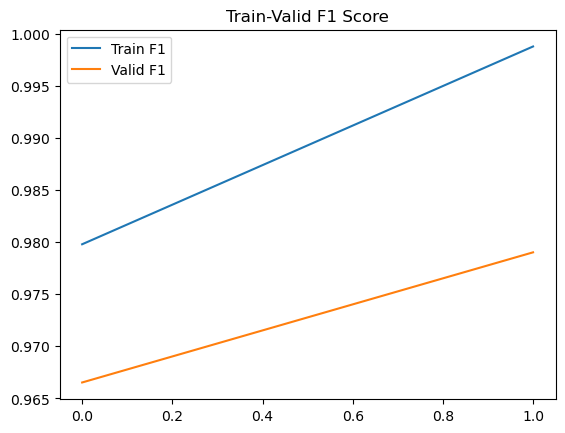

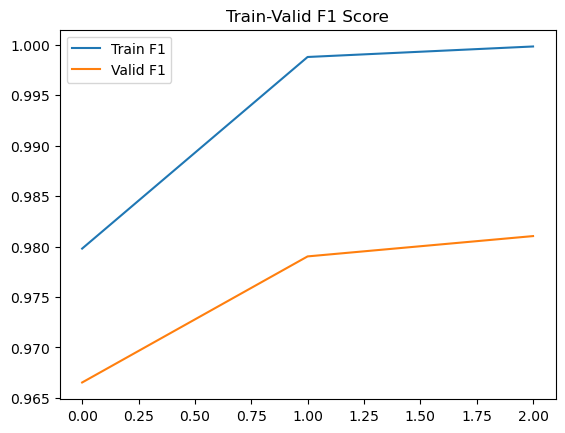

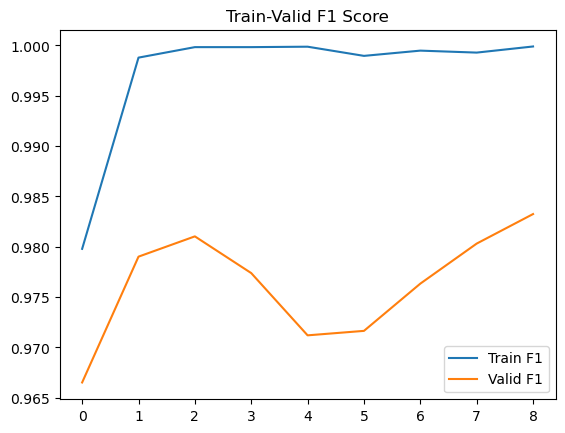

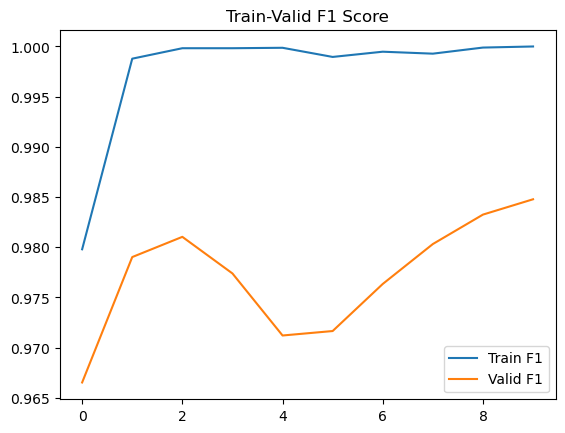

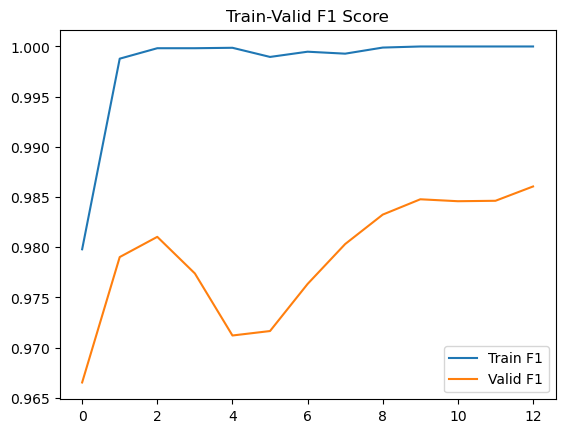

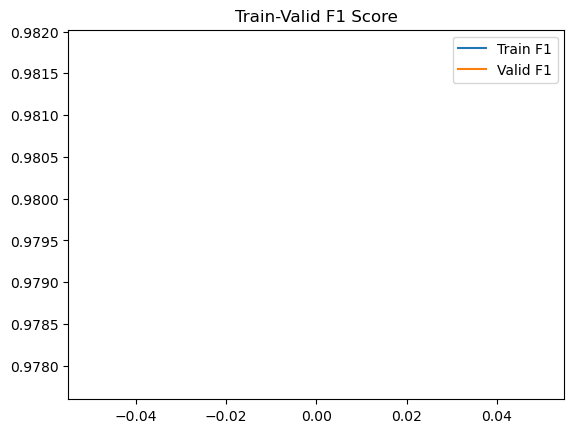

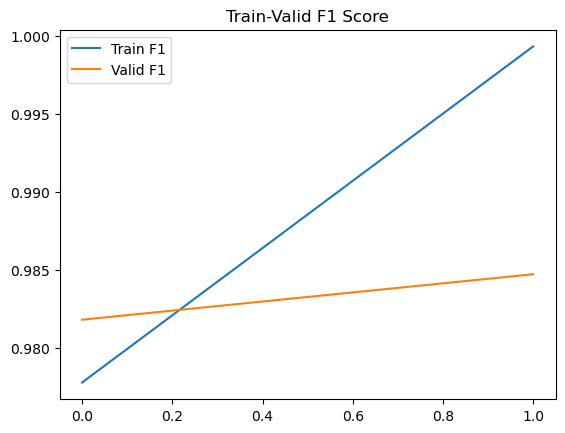

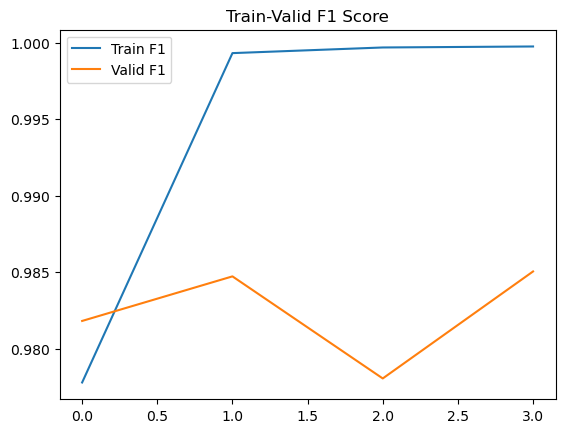

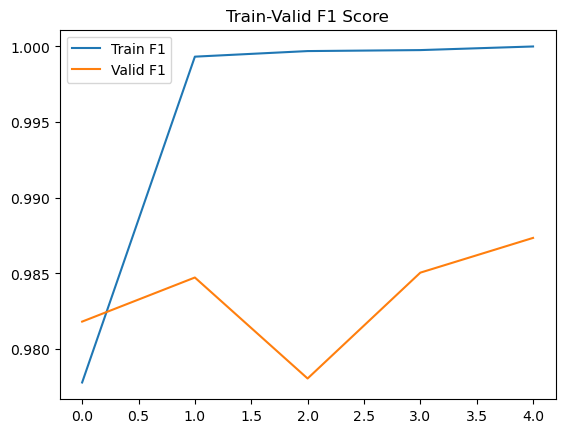

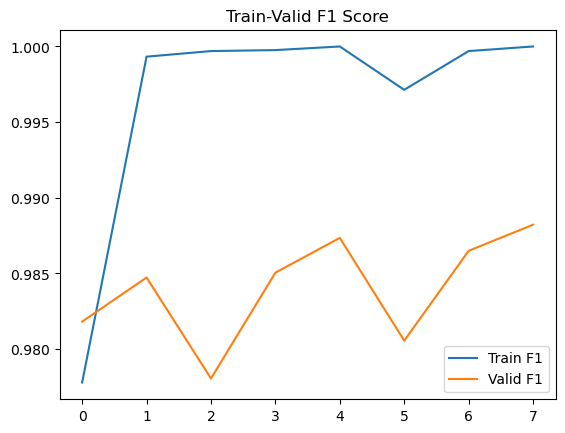

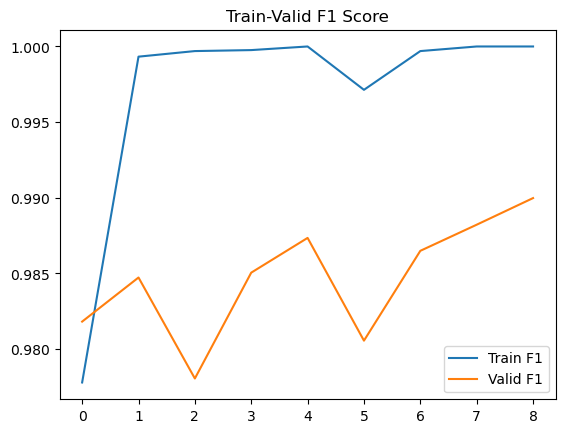

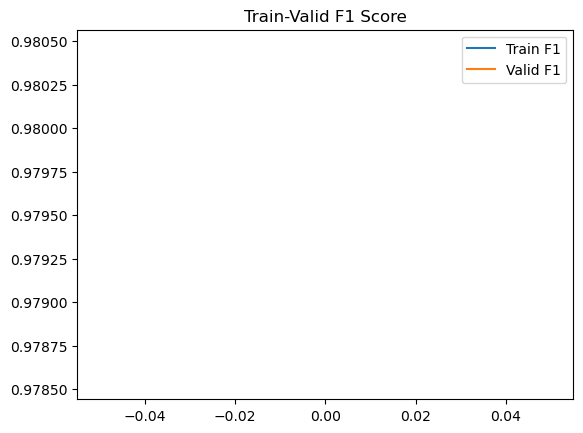

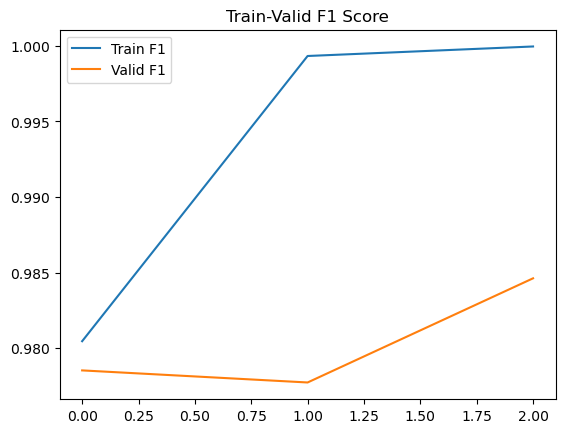

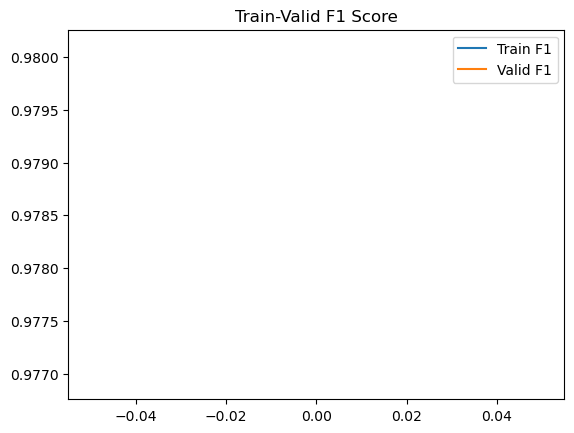

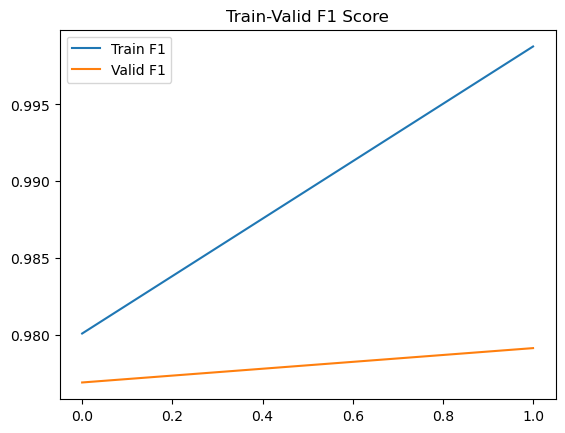

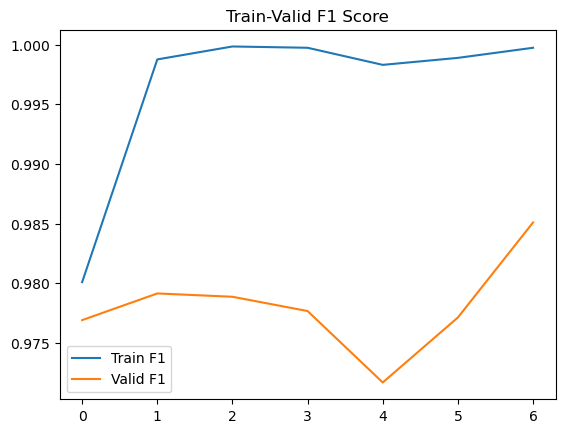

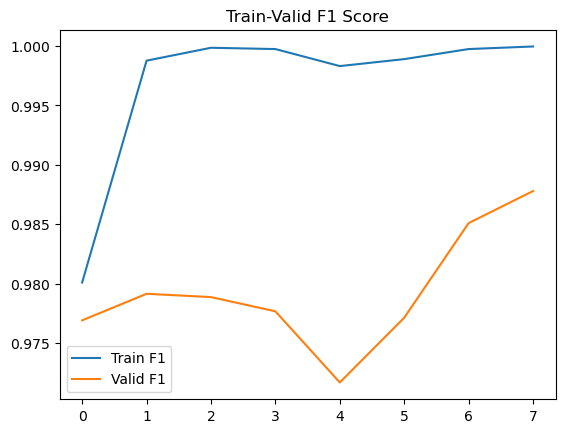

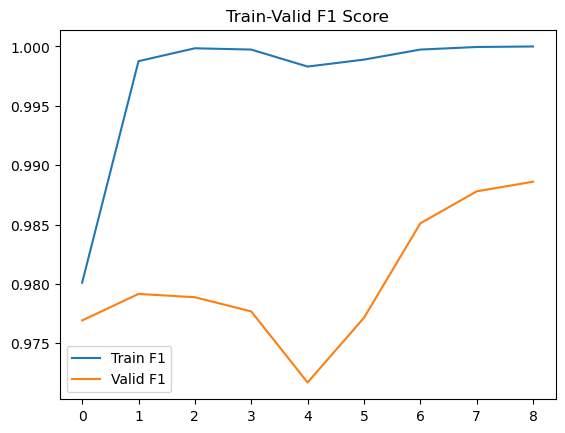

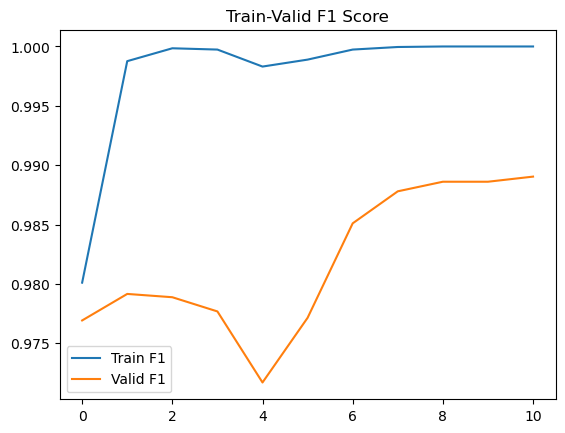

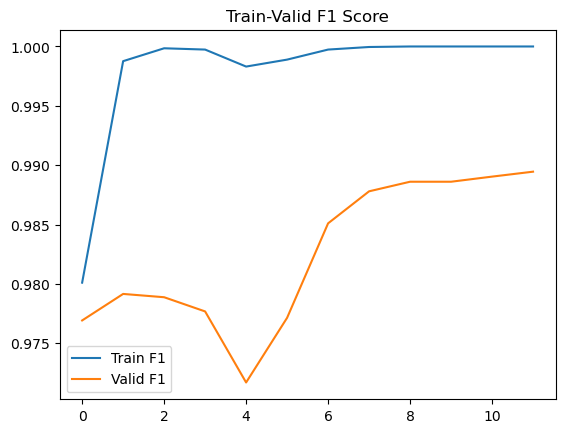

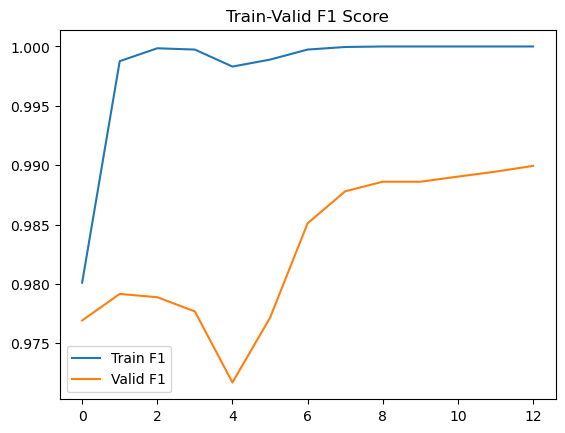

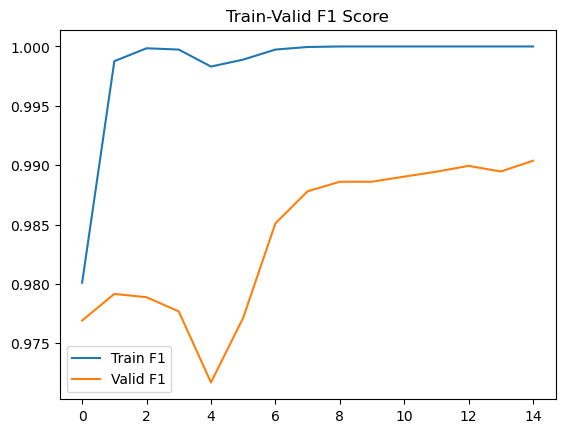

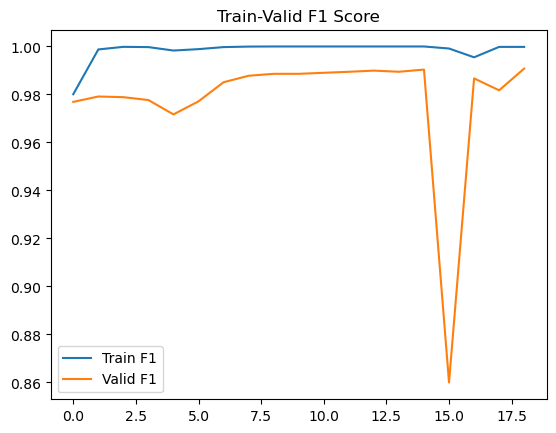

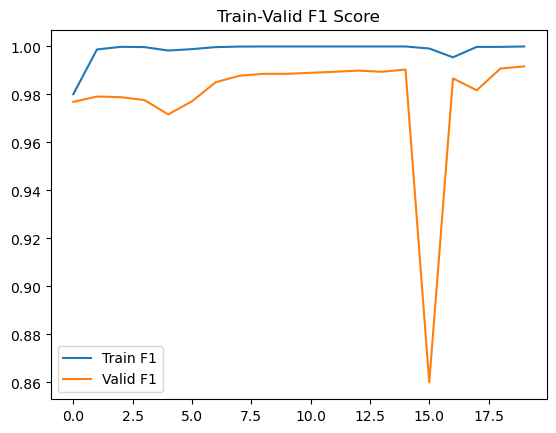

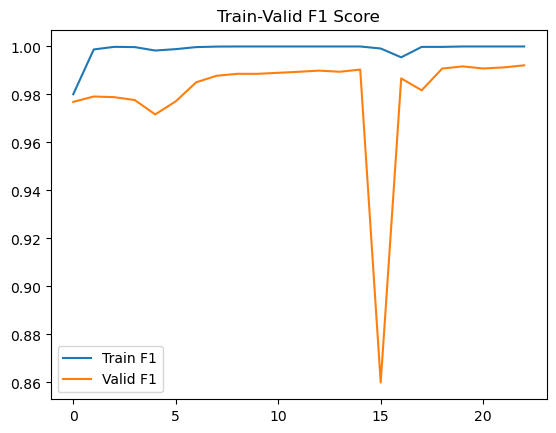

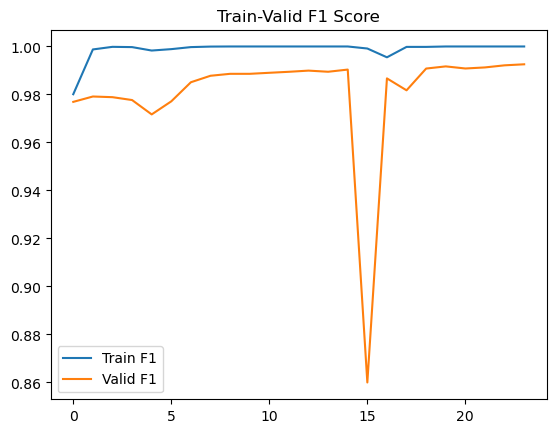

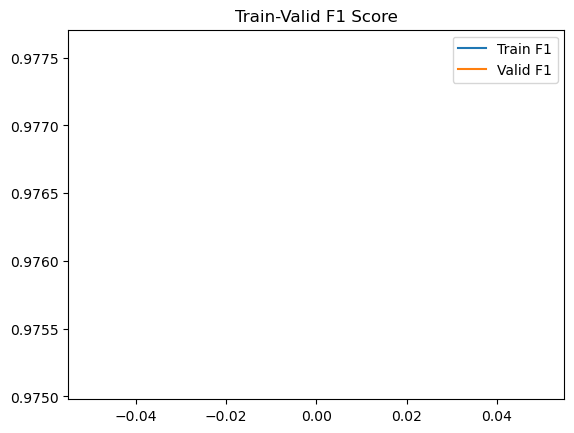

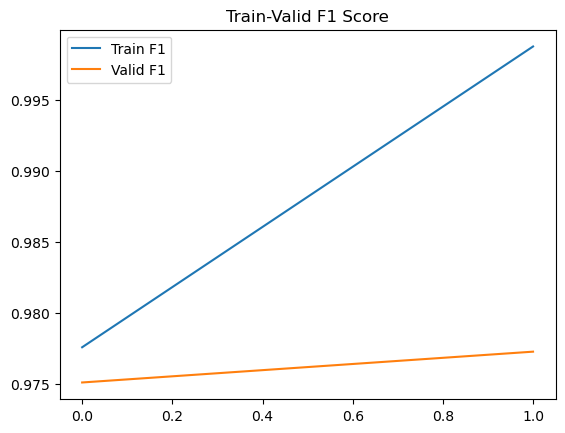

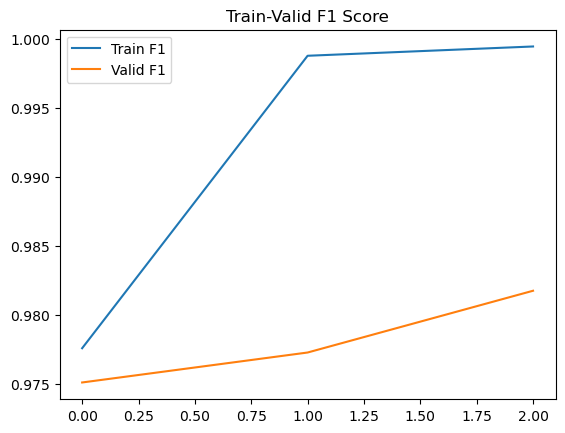

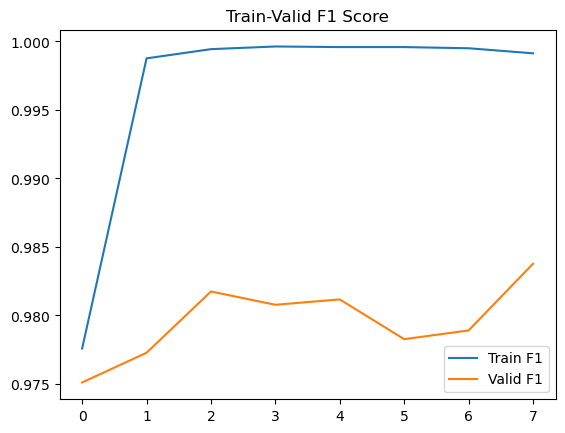

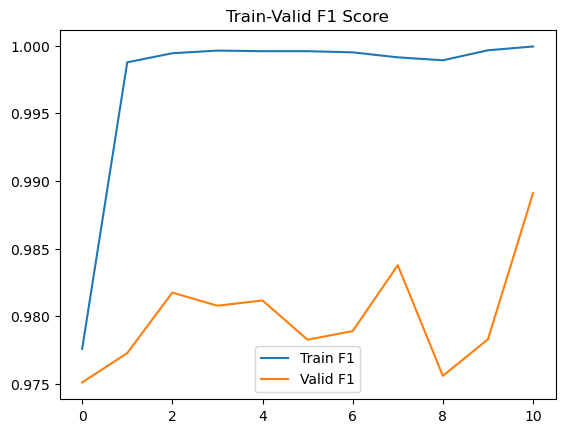

In [11]:
%run classification_baseline.ipynb

In [12]:
dist.destroy_process_group()

In [12]:
model_dir = 'resnet18/resnet18_3_23'
%run eval_test.ipynb
test

100%|███████████████████████████████████████████| 63/63 [04:35<00:00,  4.38s/it]


,image_id,dir,label,pred,confidence score
0,000000496253.jpg,../Data/train2017,0,0,0.999999
1,01bec63ca15adae7.jpg,../../disk/Data/open_image/train_0,0,0,1.000000
2,000000265273.jpg,../Data/train2017,0,0,1.000000
3,000000428495.jpg,../Data/train2017,0,0,0.999961
4,000000011422.jpg,../Data/train2017,0,0,0.999884
...,...,...,...,...,...
7995,3f1ec100e5841f58_03.jpg,../Data/disaster/augmented,1,1,0.999993
7996,290d59dab457a369_03.jpg,../Data/disaster/augmented,1,1,0.999998
7997,A red car is caught in an explosion ._00.png,../Data/disaster/generated/flickr,1,1,0.997877
7998,In the center of the image we can see trees hi...,../Data/disaster/generated/open_image,1,1,0.999929


In [13]:
print(f'accuracy: {test_acc:.4f}')
print(f'f1_score: {epoch_f1:.4f}')
print(f'confusion_matrix \n-------------------------\n {test_matrix}')

accuracy: 0.9960
f1_score: 0.9888
confusion_matrix 
-------------------------
 [[7189   11]
 [  21  779]]


In [24]:
test.to_csv('test_result/nsb2_oi_tst.csv', index=False)

In [8]:
test_acc = np.sum(test.label == test.pred) / len(test)
test_acc

0.9963420273292325